In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels 


In [2]:
df = pd.read_csv(r'C:\Users\HOME\Downloads\OneDrive_2024-05-04\Rain Forecasting\mumbai-monthly-rains1.csv')

In [3]:
df.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [4]:
df.shape

(121, 14)

Here we check the shape of the data so we have 121 Rows and 14 Columns

In [5]:
df.describe()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1961.000000,1.567235,0.929358,0.869231,1.428458,18.183632,517.854402,757.407412,465.600818,312.885747,73.983526,13.849462,3.556428,2168.115709
std,35.073732,6.462247,3.077050,2.890032,7.371307,48.628812,251.067016,285.836188,249.072915,205.135368,96.686113,29.689941,12.342390,533.263926
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.058662,103.209194,87.493370,36.313545,0.000000,0.000000,0.000000,1058.840525
25%,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,324.094617,540.745923,268.002392,149.584208,9.871696,0.000000,0.000000,1834.996957
50%,1961.000000,0.000000,0.000000,0.000000,0.000000,0.355001,482.449872,788.403637,445.870342,269.276549,43.479170,1.066086,0.000000,2126.054987
75%,1991.000000,0.000000,0.152298,0.000000,0.194165,4.208322,678.040770,942.616099,604.372615,398.645218,98.235161,9.373154,0.176149,2478.558089
max,2021.000000,51.348290,21.107118,18.252996,75.541818,234.392757,1219.518576,1358.833554,1200.956558,987.796660,552.902707,164.348387,90.044602,3563.259531


In [6]:
df.isnull().sum()

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64

so here we check whethere we have missing or not 

In [7]:
df.corr()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
Year,1.000000,-0.167339,-0.185087,-0.017924,-0.022950,0.062708,0.096394,0.178162,0.178158,0.197951,0.028973,0.025908,0.237488,0.314641
Jan,-0.167339,1.000000,0.026266,-0.049749,-0.025771,-0.069646,-0.160638,0.098176,0.030260,-0.057634,-0.076002,-0.054496,-0.055176,-0.043842
Feb,-0.185087,0.026266,1.000000,0.154678,-0.038117,-0.062442,0.068033,0.063596,0.088498,0.075960,0.262985,-0.078553,-0.045305,0.179639
Mar,-0.017924,-0.049749,0.154678,1.000000,-0.005767,0.109045,0.114081,-0.326480,-0.113080,-0.116982,-0.033481,-0.063866,-0.033206,-0.213925
April,-0.022950,-0.025771,-0.038117,-0.005767,1.000000,-0.037862,-0.200301,0.043259,0.101775,0.048446,-0.029498,-0.065394,-0.019145,-0.004569
May,0.062708,-0.069646,-0.062442,0.109045,-0.037862,1.000000,0.049596,-0.049705,0.050064,0.004509,-0.026436,-0.087351,0.216620,0.107237
June,0.096394,-0.160638,0.068033,0.114081,-0.200301,0.049596,1.000000,-0.143293,-0.044124,-0.129140,0.044818,-0.085140,0.036199,0.328760
July,0.178162,0.098176,0.063596,-0.326480,0.043259,-0.049705,-0.143293,1.000000,0.096170,0.127662,0.021268,-0.035296,0.036279,0.561159
Aug,0.178158,0.030260,0.088498,-0.113080,0.101775,0.050064,-0.044124,0.096170,1.000000,0.151878,0.233389,-0.020101,0.085781,0.605689
Sept,0.197951,-0.057634,0.075960,-0.116982,0.048446,0.004509,-0.129140,0.127662,0.151878,1.000000,0.094286,-0.010578,0.117108,0.482648


here we check the correlation between the columns 

In [8]:
df.duplicated().sum()

0

here we check we have duplicate or not

<Figure size 2200x1500 with 0 Axes>

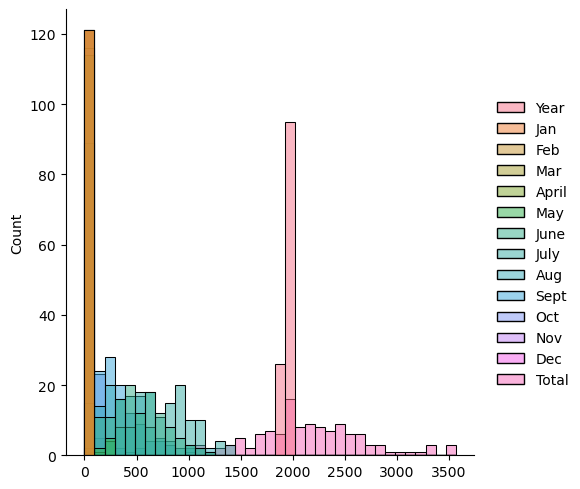

In [9]:
plt.figure(figsize= (22,15))
sns.displot(df)


In [10]:
df.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'Total'],
      dtype='object')

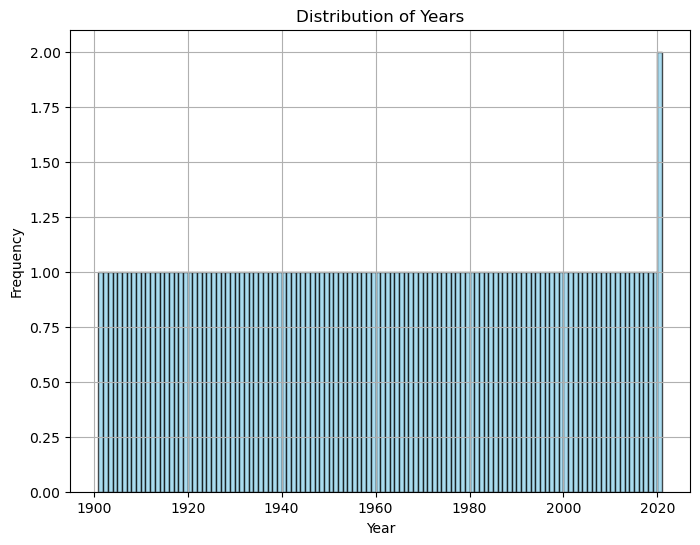

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['Year'], bins=range(df['Year'].min(), df['Year'].max() + 1), color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.grid(True)
plt.show()


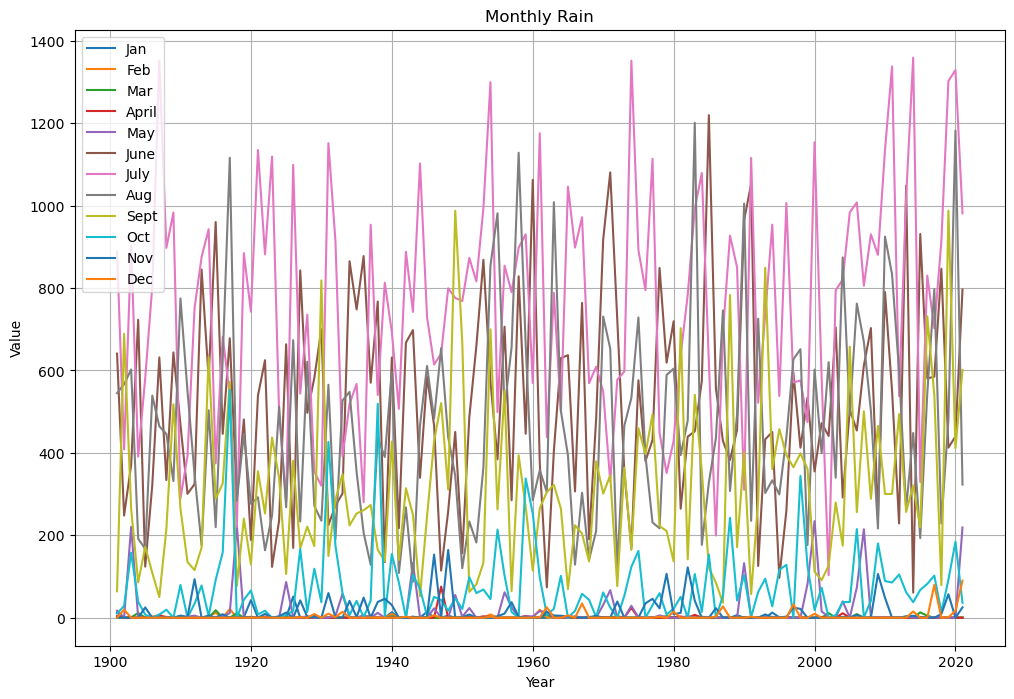

In [12]:
plt.figure(figsize=(12, 8))
for month in ['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']:
    plt.plot(df['Year'], df[month], label=month)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Monthly Rain')
plt.legend()
plt.grid(True)
plt.show()

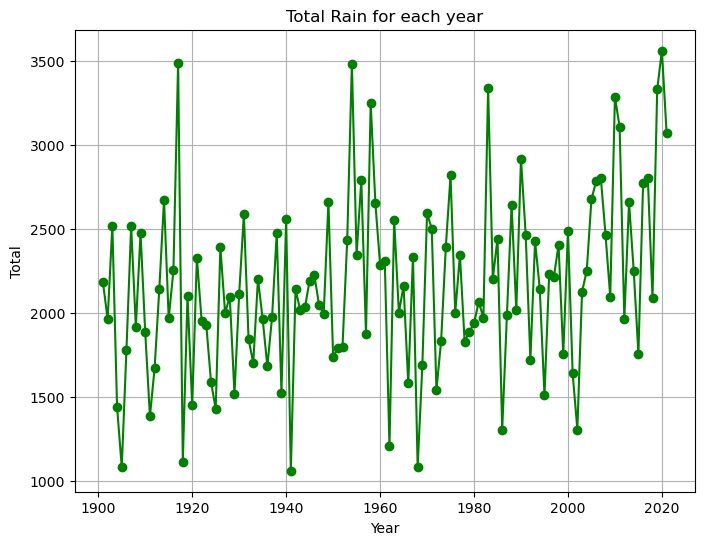

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(df['Year'], df['Total'], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total Rain for each year')
plt.grid(True)
plt.show()

In [14]:
total_stats = df['Total'].describe()
print("Summary statistics for months:")
print(df)
print("\nSummary statistics for Total:")
print(total_stats)

Summary statistics for months:
     Year        Jan       Feb        Mar     April         May        June  \
0    1901  13.116602  0.000000   0.000000  3.949669   17.139791  640.714036   
1    1902   0.000000  0.000000   0.000000  0.000000    0.355001  247.998782   
2    1903   0.000000  0.000000   0.844034  0.000000  220.568740  370.849048   
3    1904   0.000000  0.000000  11.381769  0.000000    0.000000  723.081969   
4    1905   0.662561  1.713452   0.000000  0.000000    0.000000  123.870892   
..    ...        ...       ...        ...       ...         ...         ...   
116  2017   0.000000  0.000000   0.000000  0.000000    1.043890  584.946748   
117  2018   0.000000  0.000000   0.000000  0.000000    0.000000  846.855987   
118  2019   0.000000  0.000000   0.000000  0.000000    0.000000  412.763730   
119  2020   0.000000  0.000000   0.104274  0.000000    0.000000  439.814569   
120  2021   0.727235  0.825876   0.010660  0.002233  219.075060  796.307275   

            July    

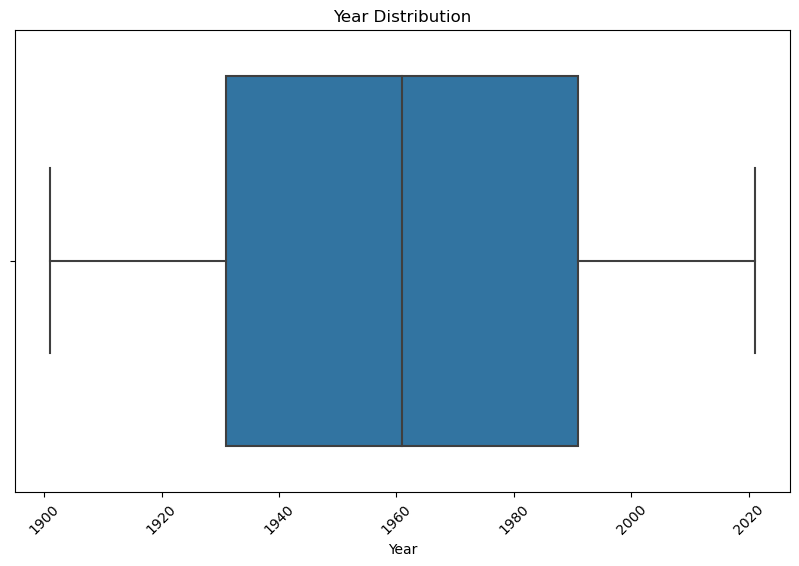

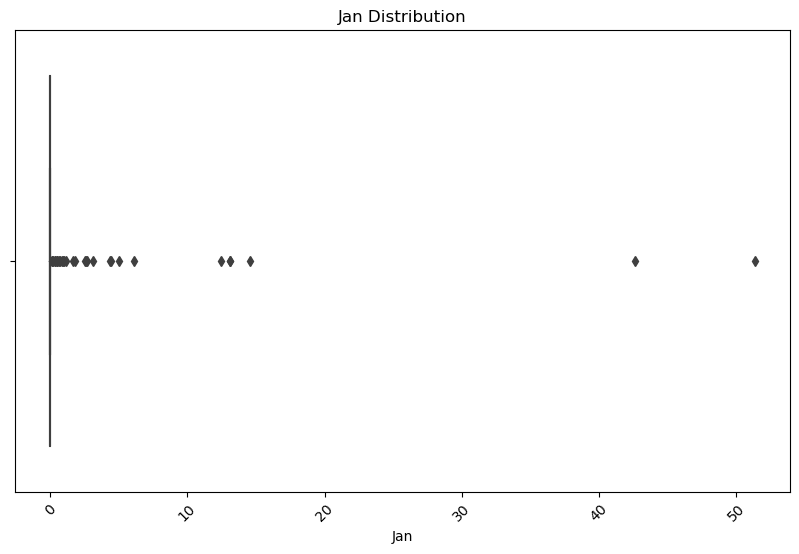

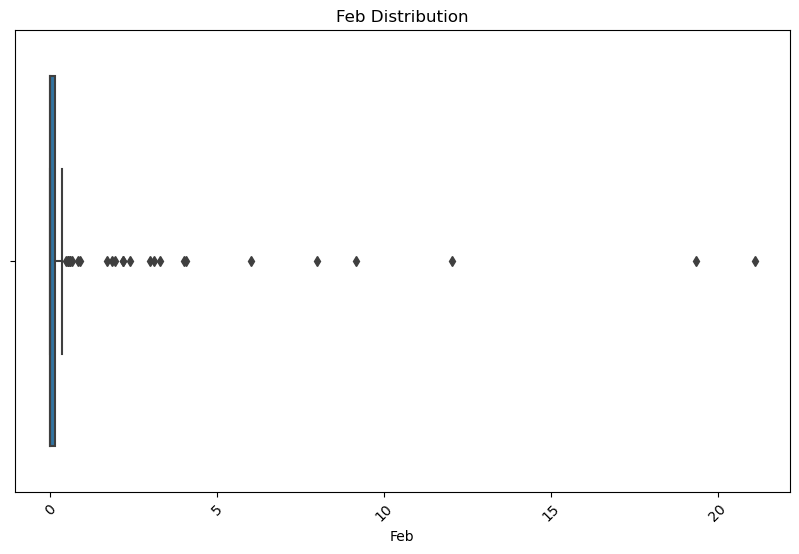

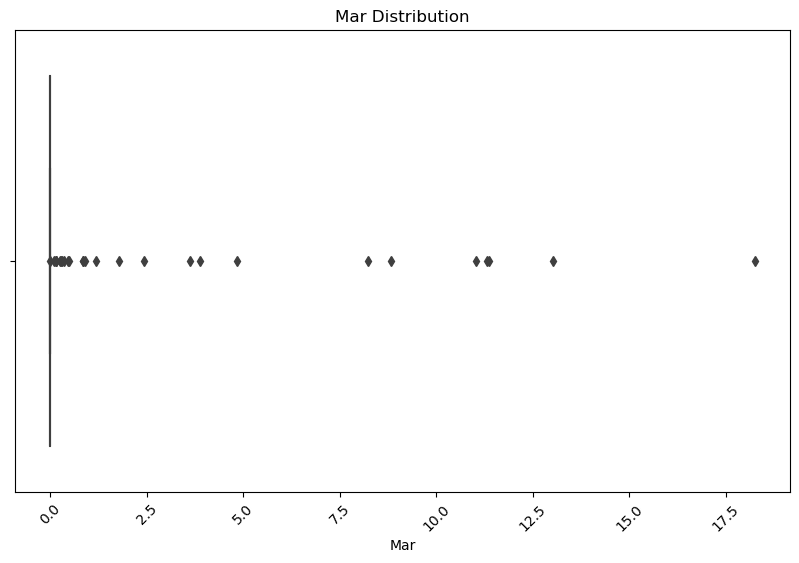

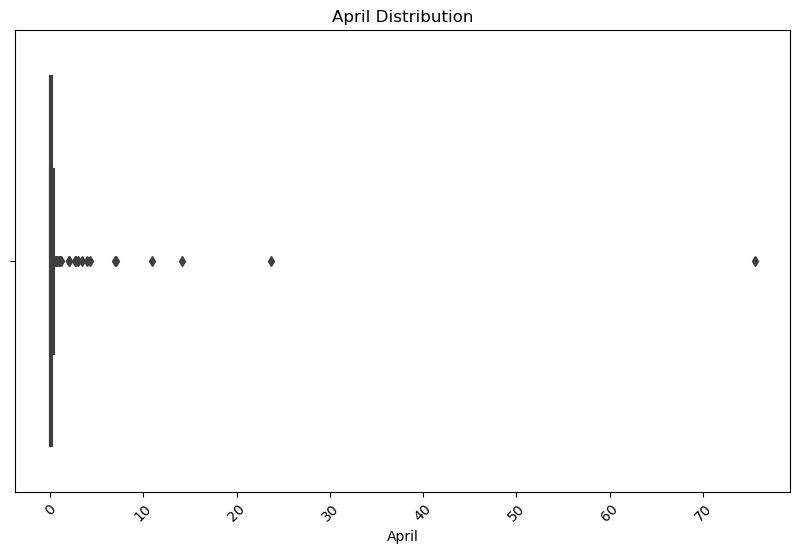

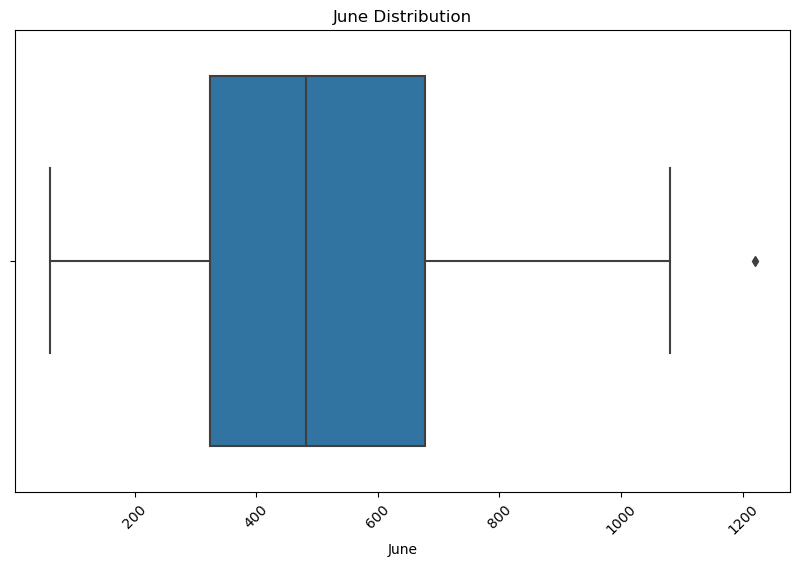

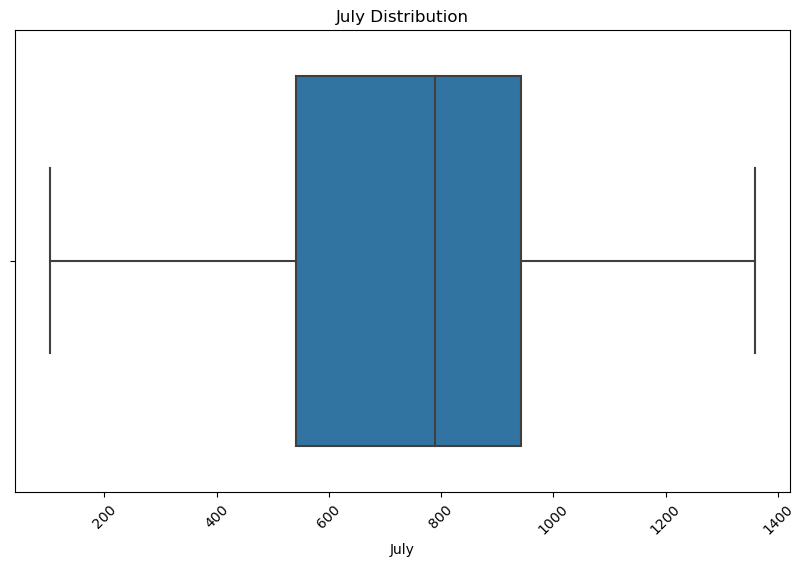

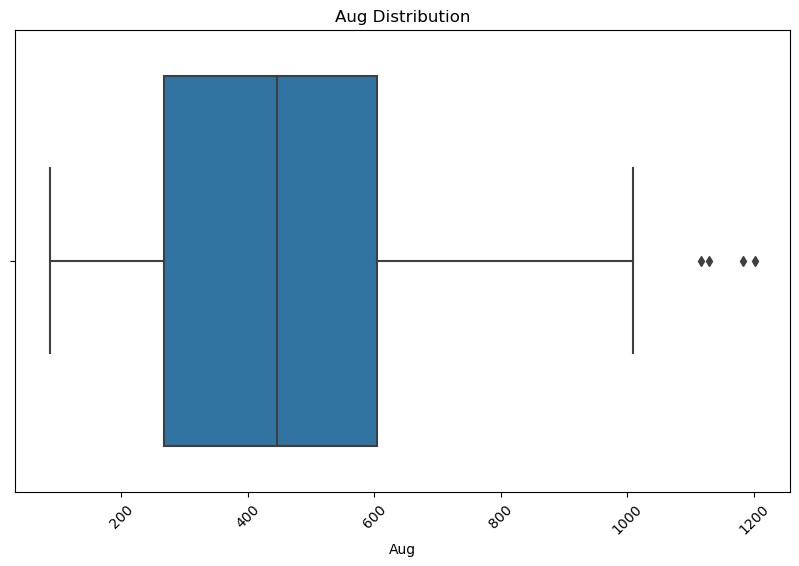

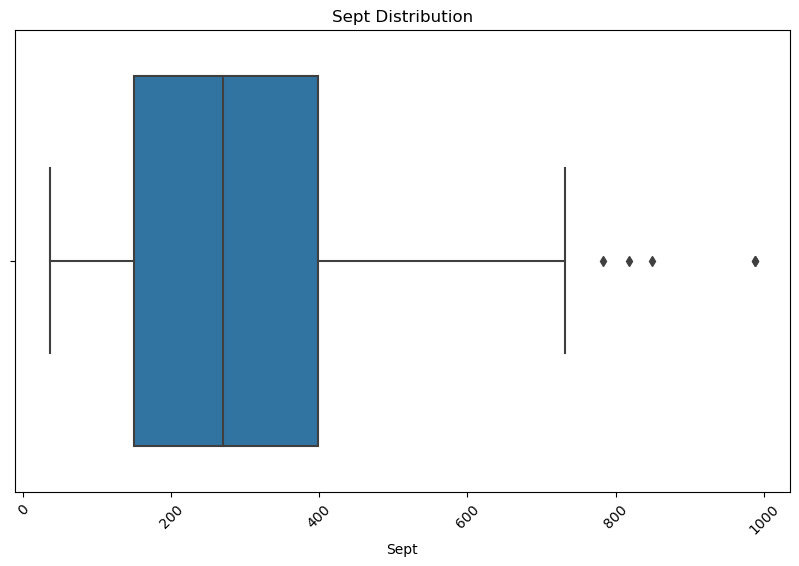

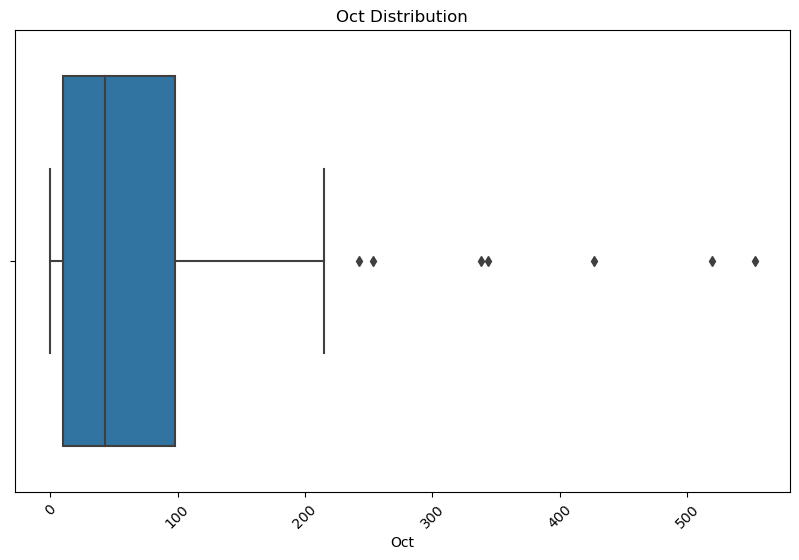

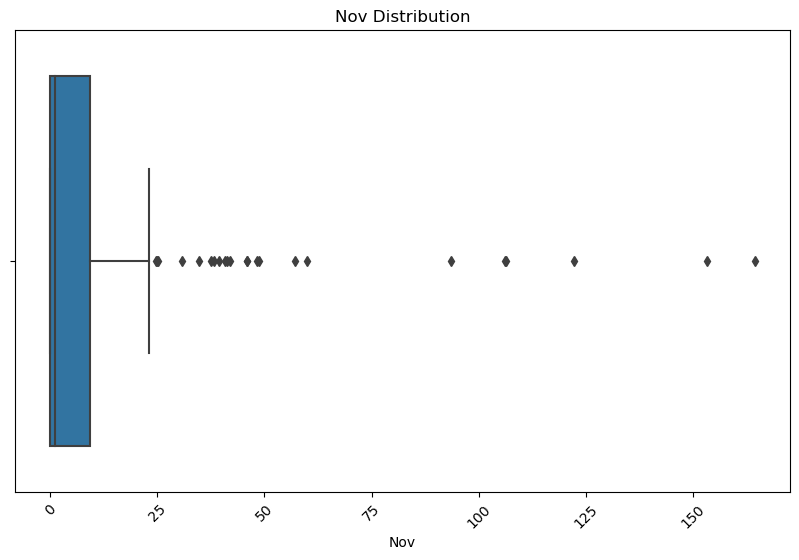

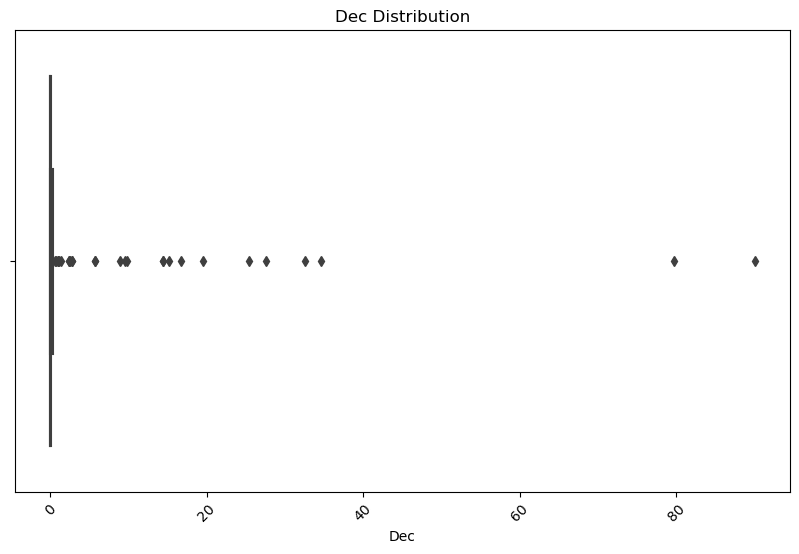

In [15]:
numerical_columns = ['Year', 'Jan','Feb','Mar','April','June','July','Aug','Sept','Oct','Nov' ,'Dec']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()
     

In [16]:
percentile25 = df[['Year', 'Jan','Feb','Mar','April','June','July','Aug','Sept','Oct','Nov' ,'Dec']].quantile(0.25)
percentile75 = df[['Year', 'Jan','Feb','Mar','April','June','July','Aug','Sept','Oct','Nov' ,'Dec']].quantile(0.75)
     

In [17]:
iqr = percentile75 - percentile25

In [18]:
iqr

Year      60.000000
Jan        0.000000
Feb        0.152298
Mar        0.000000
April      0.194165
June     353.946153
July     401.870176
Aug      336.370222
Sept     249.061010
Oct       88.363465
Nov        9.373154
Dec        0.176149
dtype: float64

In [19]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
     
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
     

Upper limit Year     2081.000000
Jan         0.000000
Feb         0.380745
Mar         0.000000
April       0.485413
June     1208.959999
July     1545.421364
Aug      1108.927948
Sept      772.236732
Oct       230.780358
Nov        23.432885
Dec         0.440373
dtype: float64
Lower limit Year     1841.000000
Jan         0.000000
Feb        -0.228447
Mar         0.000000
April      -0.291248
June     -206.824613
July      -62.059342
Aug      -236.552941
Sept     -224.007307
Oct      -122.673501
Nov       -14.059731
Dec        -0.264224
dtype: float64


In [20]:
df[['Year', 'Jan','Feb','Mar','April','June','July','Aug','Sept','Oct','Nov' ,'Dec']] = np.where(
    df[['Year', 'Jan','Feb','Mar','April','June','July','Aug','Sept','Oct','Nov' ,'Dec']] > upper_limit,
    upper_limit,
    np.where(
        df[['Year', 'Jan','Feb','Mar','April','June','July','Aug','Sept','Oct','Nov' ,'Dec']] < lower_limit,
        lower_limit,
        df[['Year', 'Jan','Feb','Mar','April','June','July','Aug','Sept','Oct','Nov' ,'Dec']]
    )
)
     

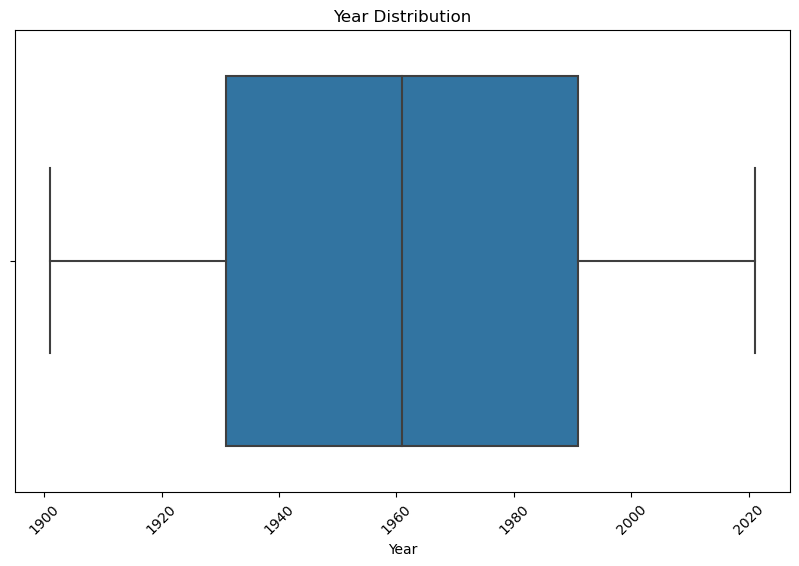

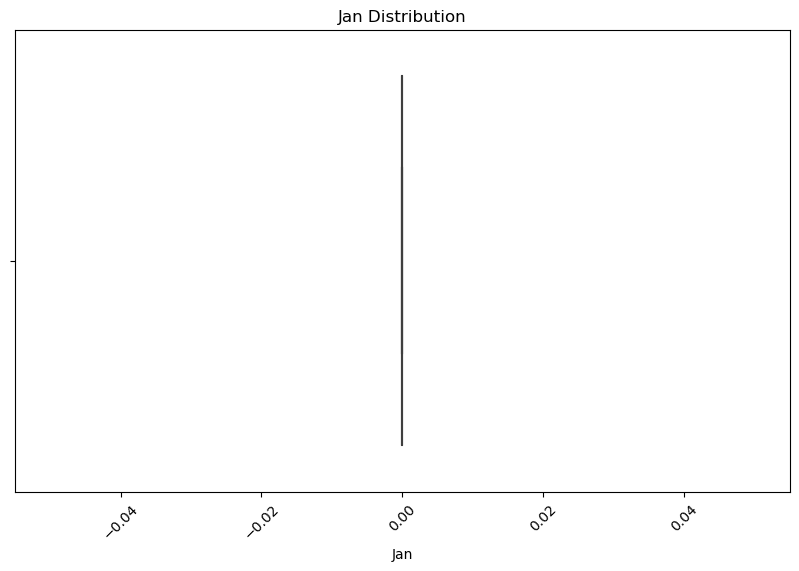

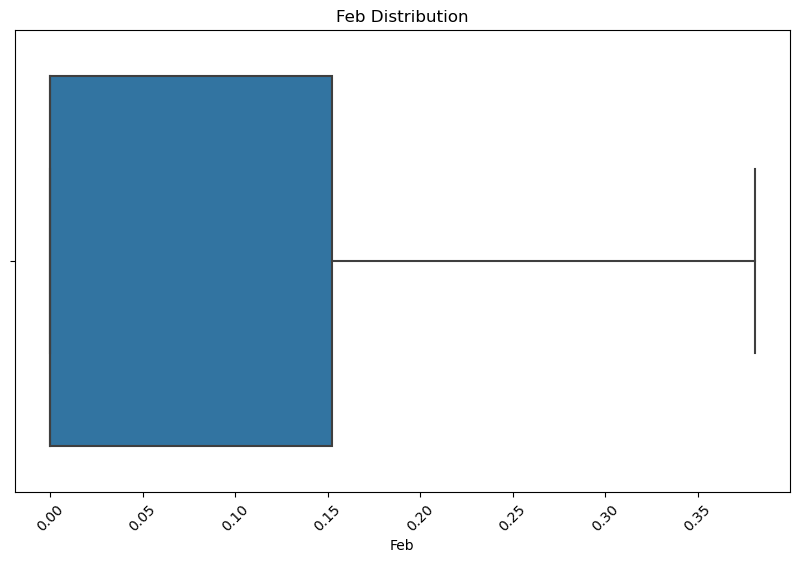

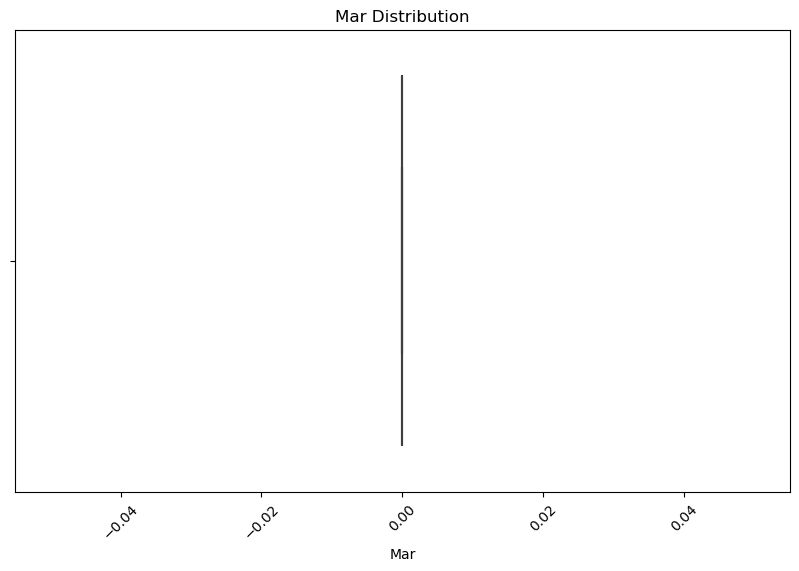

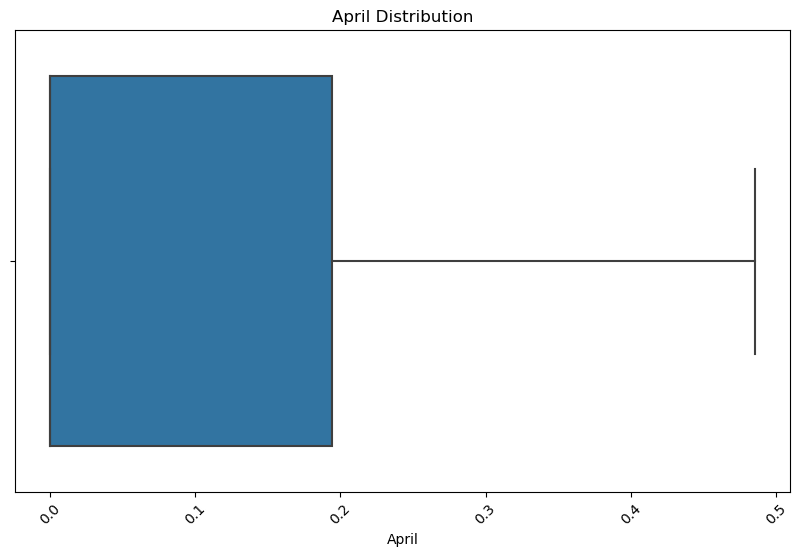

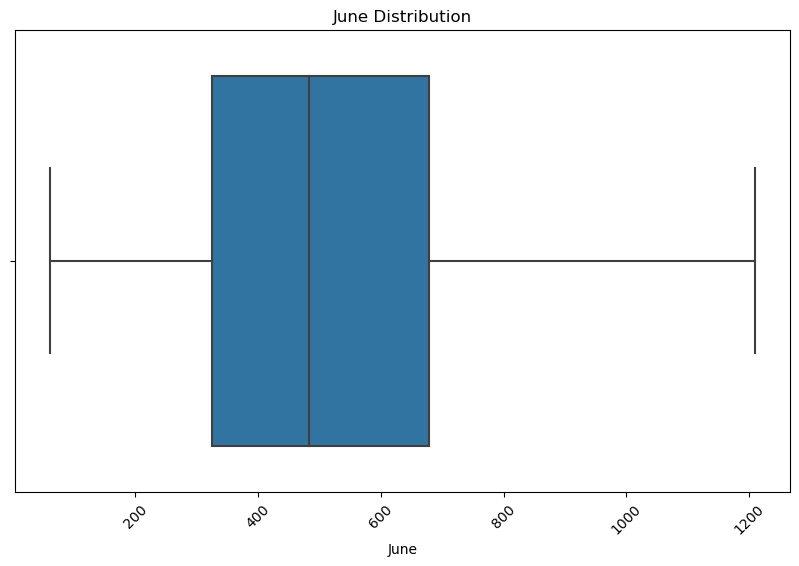

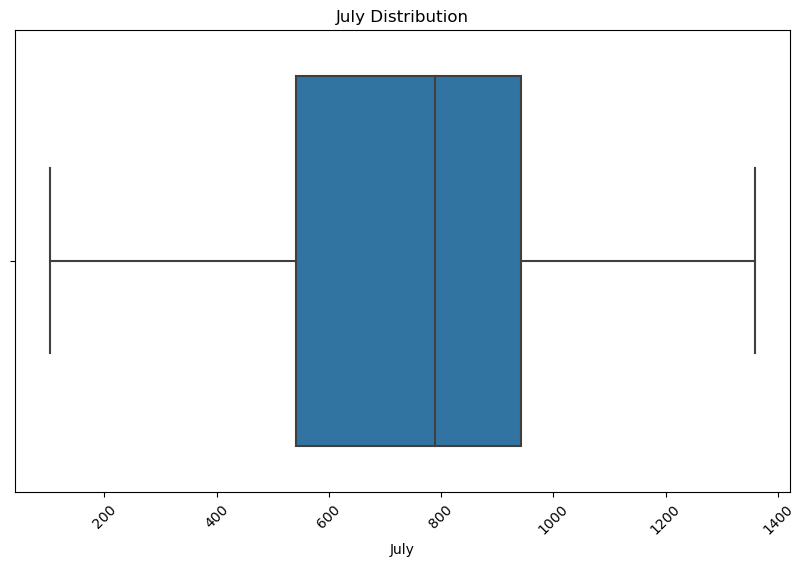

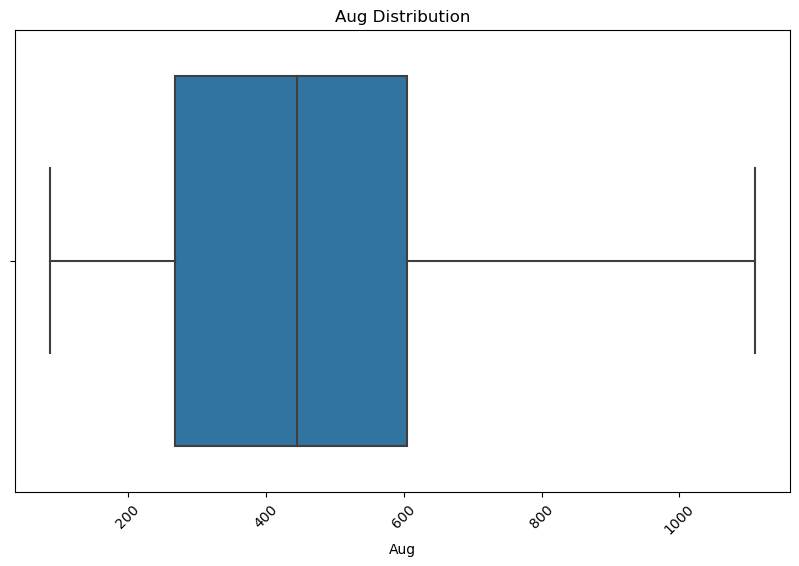

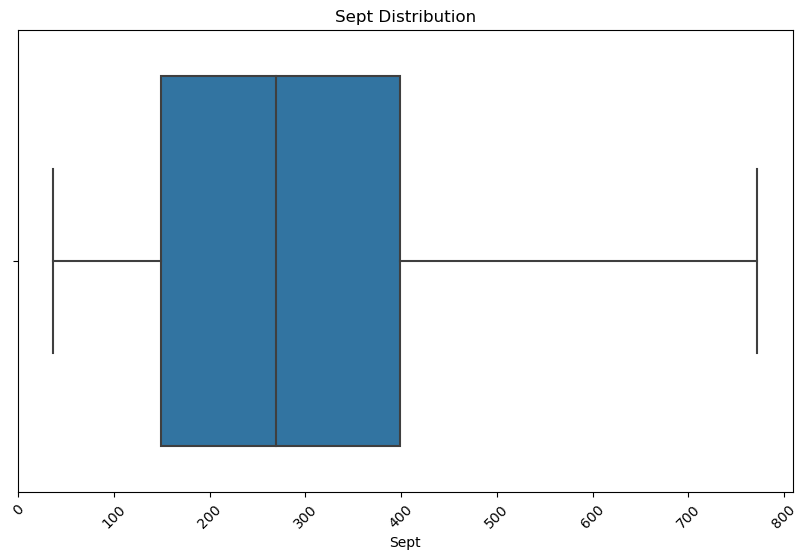

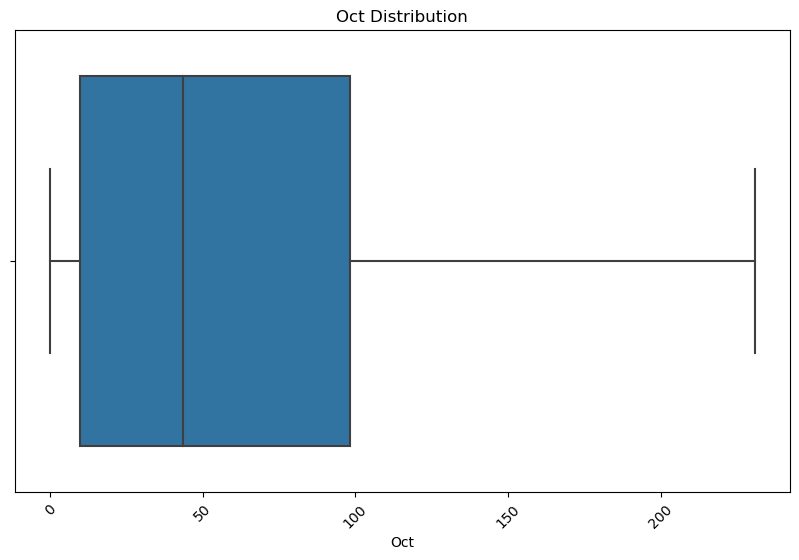

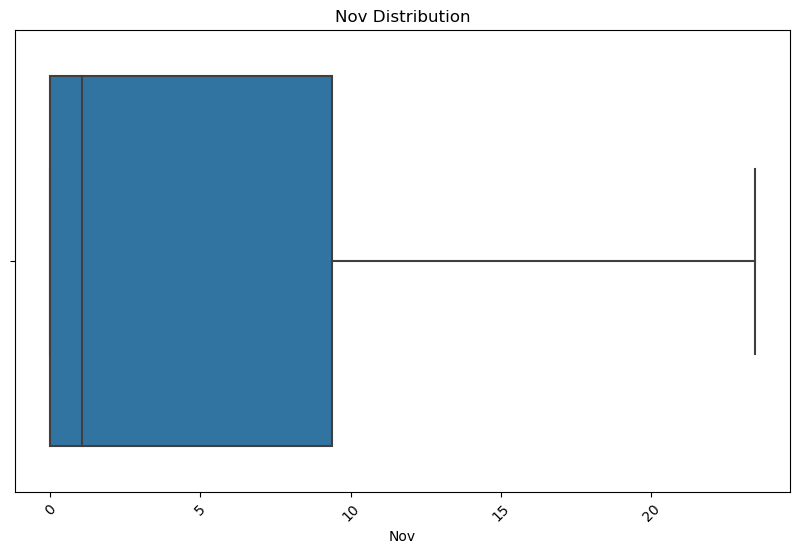

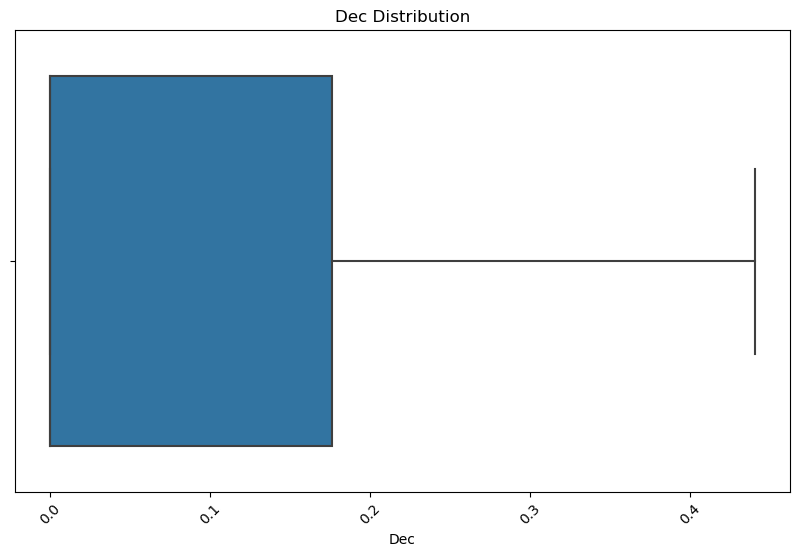

In [21]:
numerical_columns = ['Year', 'Jan','Feb','Mar','April','June','July','Aug','Sept','Oct','Nov' ,'Dec']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)
    plt.show()
     

In [23]:
X = df.drop('Total',axis = 1)
y = df['Total']

In [24]:
X.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,1901.0,0.0,0.000000,0.0,0.485413,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000
1,1902.0,0.0,0.000000,0.0,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,0.440373
2,1903.0,0.0,0.000000,0.0,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000
3,1904.0,0.0,0.000000,0.0,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000
4,1905.0,0.0,0.380745,0.0,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,23.432885,0.000000


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


In [34]:
from sklearn.preprocessing import StandardScale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ImportError: cannot import name 'StandardScale' from 'sklearn.preprocessing' (C:\Users\HOME\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)